<h1 align="center" style="background-color:#42A3F4;color:black">Exploratory Data Analysis</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
d1=pd.read_csv(r"D:\Python\Datasets\train.csv")
d1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration

In [43]:
print(f"The shape of the dataset is: {d1.shape}")
print(f"The size of the dataset is: {d1.size}")

The shape of the dataset is: (891, 12)
The size of the dataset is: 10692


In [41]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
missing_df=d1.isnull().sum().to_frame().rename(columns={0:"Missing values"})
missing_df["Percentage of missing values"]=(round((d1.isnull().sum()*100)/(len(d1)),2).astype(str)+"%")
missing_df

,Missing values,Percentage of missing values
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,177,19.87%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,0,0.0%


In [64]:
d1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
for i in d1.columns:
    null_rate=d1[i].isna().sum()*100/len(d1)
    if null_rate>0:
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Age null rate: 19.87%
Cabin null rate: 77.1%
Embarked null rate: 0.22%


In [68]:
d1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
d1[d1.duplicated()].sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0.0
SibSp,0
Parch,0
Ticket,0
Fare,0.0


In [70]:
d1["Name"].duplicated().sum()

0

 <h1>Why do EDA</h1>
  
  <ul>
    <li>Model building.</li>
    <li>Analysis and reporting.</li>
    <li>Validate assumptions.</li>
    <li>Handling missing values.</li>
    <li>Feature engineering.</li>
    <li>Detecting outliers.</li>
  </ul>


# Define the data types of the columns

In [71]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
d1.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S


* Numerical- PassengerId, Age, Fare.
* Categorical- Survived, Pclass, Sex, SibSp, Parch, Embarked.
* Mixed- Name, Ticket, Mixed

<h1>Univariate Analysis</h1>

  <p><strong>Univariate analysis:</strong> Univariate analysis focuses on analyzing each feature in the dataset independently.</p>
  
  <ul>
    <li><strong>Distribution Analysis:</strong> The distribution of each feature is examined to identify its shape, central tendency, and dispersion.</li>
    <li><strong>Identifying Potential Issues:</strong> Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values.</li>
  </ul>

  <h4>The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:</h4>

  <ul>
    <li><strong>Normal Distribution:</strong> A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.</li>
    <li><strong>Skewed Distribution:</strong> A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).</li>
    <li><strong>Bimodal Distribution:</strong> A distribution with two peaks or modes.</li>
    <li><strong>Uniform Distribution:</strong> A distribution where all values have an equal chance of occurring.</li>
  </ul>

  <p>The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.</p>


#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


# AGE

### **Conclusions:**
* Age is (almost) normally distributed.
* About 20% of the values are missing.
* There are some outliers.

In [73]:
d1["Age"].describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

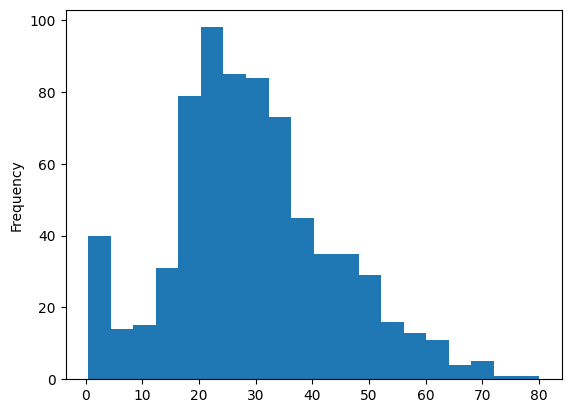

In [74]:
d1["Age"].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

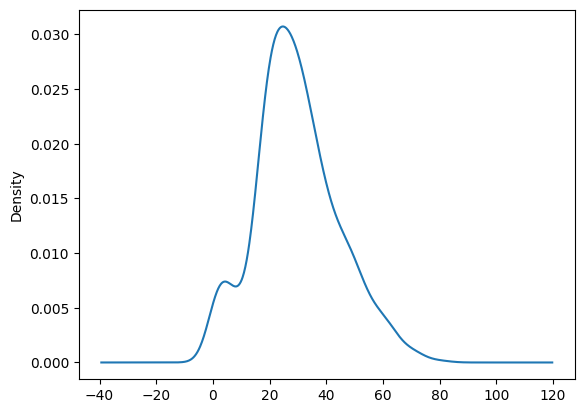

In [75]:
d1["Age"].plot(kind="kde")

In [76]:
d1["Age"].skew()

0.38910778230082704

<Axes: >

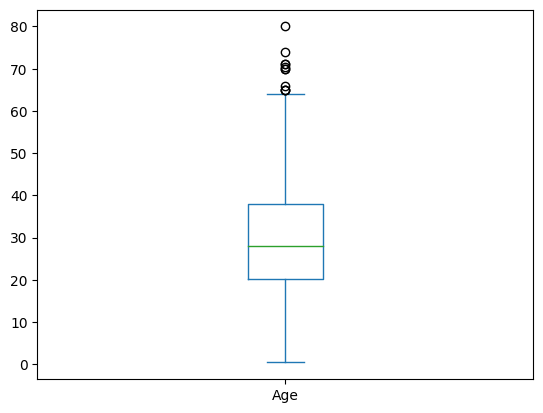

In [77]:
d1["Age"].plot(kind="box")

In [78]:
d1[d1["Age"]>65].count()

PassengerId    8
Survived       8
Pclass         8
Name           8
Sex            8
Age            8
SibSp          8
Parch          8
Ticket         8
Fare           8
Cabin          3
Embarked       8
dtype: int64

In [79]:
d1["Age"].isnull().sum()*100/len(d1)

19.865319865319865

# Fare

### **Conclusions:**

In [80]:
d1["Fare"].describe().to_frame()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Frequency'>

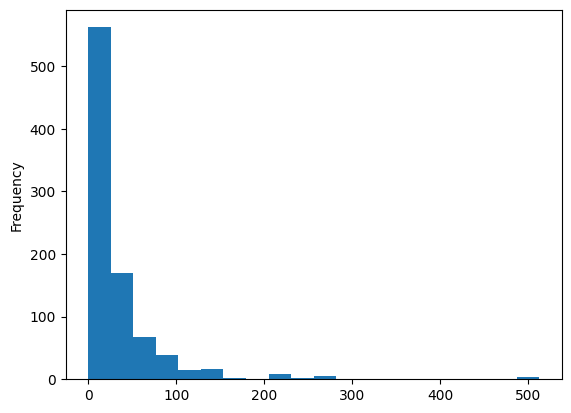

In [81]:
d1["Fare"].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

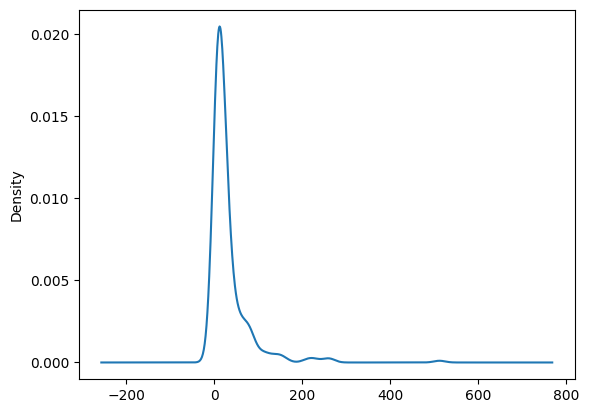

In [82]:
d1["Fare"].plot(kind="kde")

In [83]:
d1["Fare"].skew()

4.787316519674893

<Axes: >

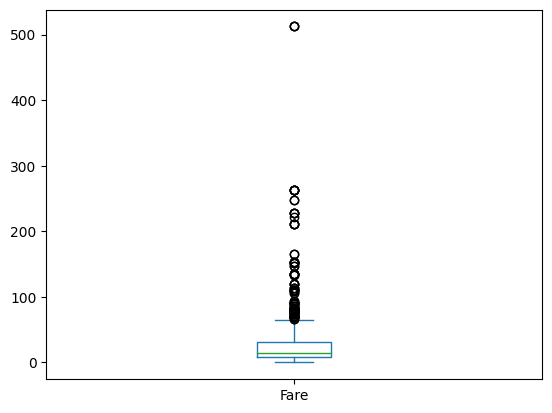

In [84]:
d1["Fare"].plot(kind="box")

In [85]:
d1[d1["Fare"]>90].count()

PassengerId    57
Survived       57
Pclass         57
Name           57
Sex            57
Age            52
SibSp          57
Parch          57
Ticket         57
Fare           57
Cabin          47
Embarked       57
dtype: int64

In [86]:
d1["Fare"].isnull().sum()

0